<a href="https://colab.research.google.com/github/jinquan122/Palm-oil-and-chemical-ingredient-analysis/blob/main/Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install factor_analyzer
!pip install --upgrade pingouin
import pandas as pd
from pandas import Series, DataFrame
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats
import seaborn as sns
import scipy.stats as sc
import statsmodels.graphics.gofplots as sm
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.preprocessing import normalize
import statsmodels.formula.api as smm
import statsmodels.stats.multicomp as multi
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

     |████████████████████████████████| 205 kB 8.7 MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.12-py3-none-any.whl size=204754 sha256=09d32d29fea7acf25828e2b104d0d5e8905ea12b41d60507e31c7ebcf75f0bc2
  Stored in directory: /root/.cache/pip/wheels/5b/8a/ed/fafe2714a0f047d64fb582105b174b5e5218c82a0d787bbec4
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=e375b18ce50b9562f61c4c51c068a826e978a39761768d4b611023036c9428be
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ingredient.csv")

In [ ]:
df

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00
...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22


In [ ]:
df.dtypes

a    float64
b    float64
c    float64
d    float64
e    float64
f    float64
g    float64
h    float64
i    float64
dtype: object

In [ ]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [ ]:
#discover number of zero appeared in h and i
a =0
for i in df.h:
  if (i == 0):
    a= a+1

b =0
for i in df.i:
  if (i == 0):
    b= b+1

print("number of zero in h:", a)
print("number of zero in i:", b)

number of zero in h: 176
number of zero in i: 144


In [ ]:
#checking the missing value
df.isna().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

In [ ]:
df.corr()

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


In [ ]:
#show the p-value and correlation between the varaibles
df.rcorr(stars=False)

,a,b,c,d,e,f,g,h,i
a,-,0.005,0.074,0.000,0.000,0.000,0.000,0.996,0.037
b,-0.192,-,0.000,0.022,0.309,0.000,0.000,0.000,0.000
c,-0.122,-0.274,-,0.000,0.015,0.937,0.000,0.000,0.226
d,-0.407,0.157,-0.482,-,0.936,0.000,0.000,0.000,0.279
e,-0.542,-0.07,-0.166,-0.006,-,0.005,0.002,0.136,0.17
f,-0.29,-0.266,0.005,0.326,-0.193,-,0.000,0.535,0.911
g,0.81,-0.275,-0.444,-0.26,-0.209,-0.318,-,0.1,0.068
h,-0.0,0.327,-0.492,0.479,-0.102,-0.043,-0.113,-,0.393
i,0.143,-0.241,0.083,-0.074,-0.094,-0.008,0.125,-0.059,-


In [ ]:
df.rcorr()

,a,b,c,d,e,f,g,h,i
a,-,**,,***,***,***,***,,*
b,-0.192,-,***,*,,***,***,***,***
c,-0.122,-0.274,-,***,*,,***,***,
d,-0.407,0.157,-0.482,-,,***,***,***,
e,-0.542,-0.07,-0.166,-0.006,-,**,**,,
f,-0.29,-0.266,0.005,0.326,-0.193,-,***,,
g,0.81,-0.275,-0.444,-0.26,-0.209,-0.318,-,,
h,-0.0,0.327,-0.492,0.479,-0.102,-0.043,-0.113,-,
i,0.143,-0.241,0.083,-0.074,-0.094,-0.008,0.125,-0.059,-


In [ ]:
#To find the VIF value for checking multicollinearity
vif_data = df.drop("g",axis=1)
vif_data = vif_data.drop("a",axis=1)
X = vif_data.assign(const=1)
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

b            1.355447
c            1.610087
d            1.761771
e            1.176548
f            1.404605
h            1.646275
i            1.088565
const    11633.361820
dtype: float64

In [ ]:
#To find out the skewness and kurtosis of the variables
a1 = skew(df.a)
a2 = kurtosis(df.a)
b1 = skew(df.b)
b2 = kurtosis(df.b)
c1 = skew(df.c)
c2 = kurtosis(df.c)
d1 = skew(df.d)
d2 = kurtosis(df.d)
e1 = skew(df.e)
e2 = kurtosis(df.e)
f1 = skew(df.f)
f2 = kurtosis(df.f)
g1 = skew(df.g)
g2 = kurtosis(df.g)
h1 = skew(df.h)
h2 = kurtosis(df.h)
i1 = skew(df.i)
i2 = kurtosis(df.i)

data = [["a",a1,a2],["b",b1,b2],["c",c1,c2],["d",d1,d2],["e",e1,e2],["f",f1,f2],["g",g1,g2],["h",h1,h2],["i",i1,i2]]
normaldist = pd.DataFrame(data, columns =["Chemical","Skew","Kurtois"])
normaldist
                                                                                                                            

,Chemical,Skew,Kurtois
0,a,1.614015,4.789354
1,b,0.450992,2.953477
2,c,-1.144465,-0.428702
3,d,0.900918,1.984832
4,e,-0.725317,2.871105
5,f,6.505636,53.392327
6,g,2.032677,6.498968
7,h,3.392431,12.222071
8,i,1.742007,2.572318


In [ ]:
#To carry out shapiro testing for normality
p_value_a = "{:.4f}".format(stats.shapiro(df.a)[1])
p_value_b = "{:.4f}".format(stats.shapiro(df.b)[1])
p_value_c = "{:.4f}".format(stats.shapiro(df.c)[1])
p_value_d = "{:.4f}".format(stats.shapiro(df.d)[1])
p_value_e = "{:.4f}".format(stats.shapiro(df.e)[1])
p_value_f = "{:.4f}".format(stats.shapiro(df.f)[1])
p_value_g = "{:.4f}".format(stats.shapiro(df.g)[1])
p_value_h = "{:.4f}".format(stats.shapiro(df.h)[1])
p_value_i = "{:.4f}".format(stats.shapiro(df.i)[1])

data = [["a",p_value_a],["b",p_value_b],["c",p_value_c],["d",p_value_d],["e",p_value_e],["f",p_value_f],["g",p_value_g],["h",p_value_h],["i",p_value_i]]
p_value = pd.DataFrame(data, columns =["Chemical","P-value"])
p_value

,Chemical,P-value
0,a,0.0000
1,b,0.0000
2,c,0.0000
3,d,0.0002
4,e,0.0000
5,f,0.0000
6,g,0.0000
7,h,0.0000
8,i,0.0000


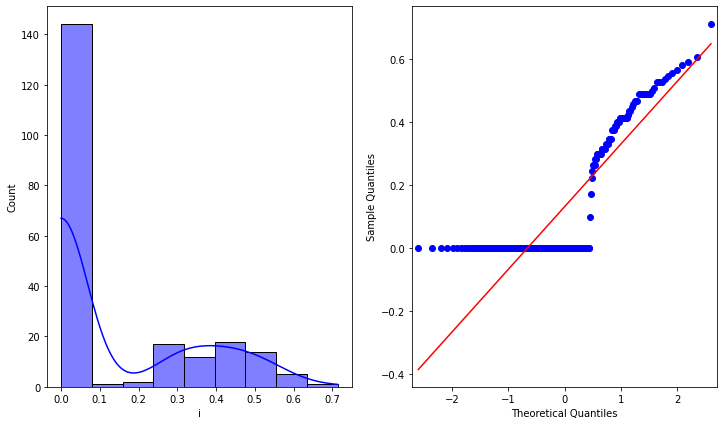

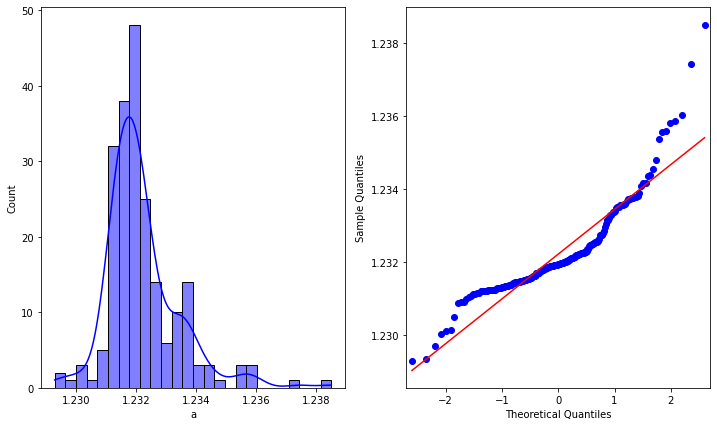

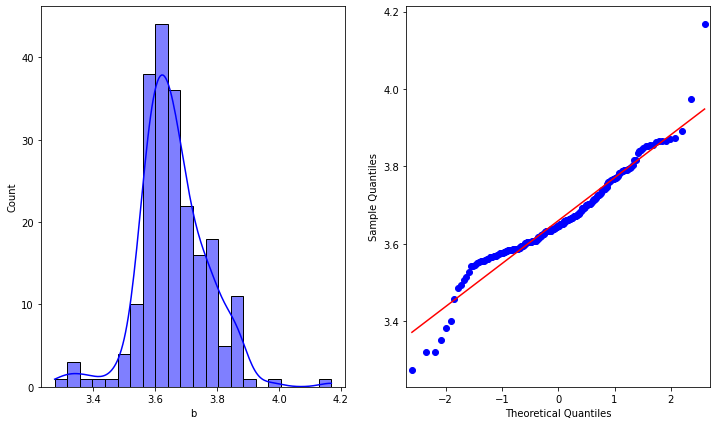

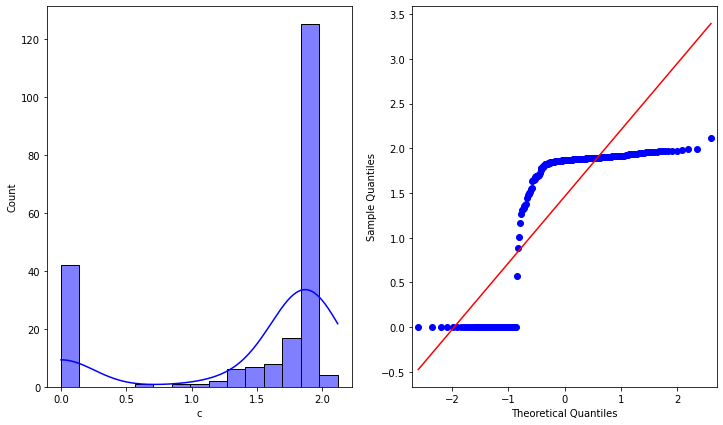

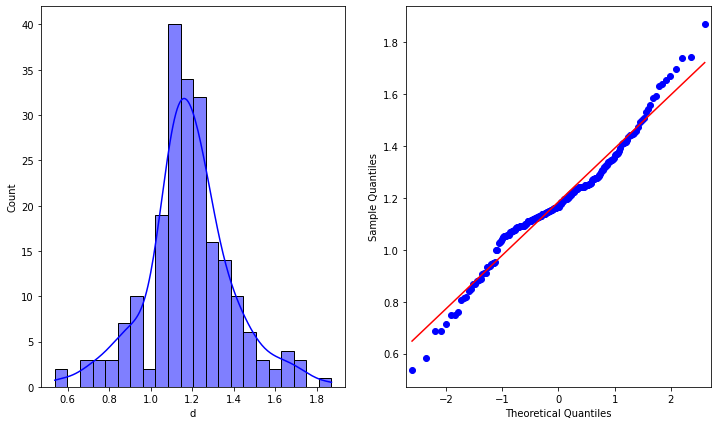

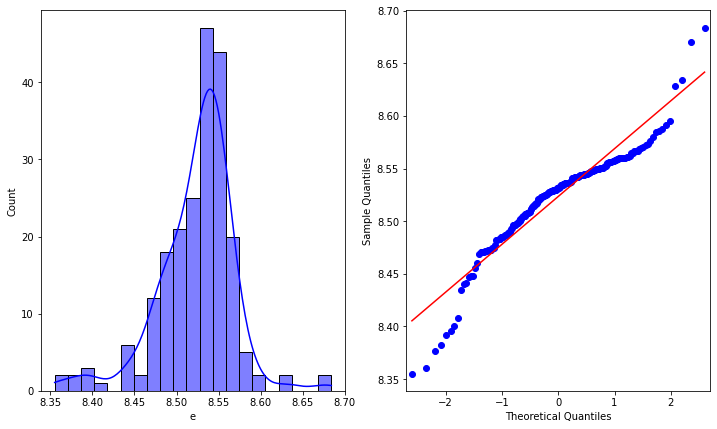

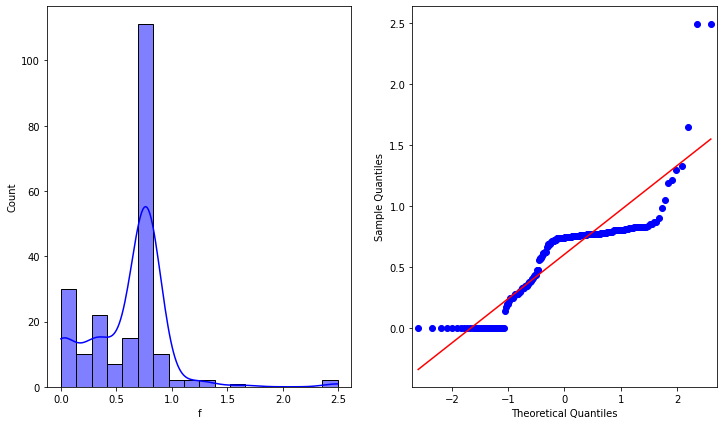

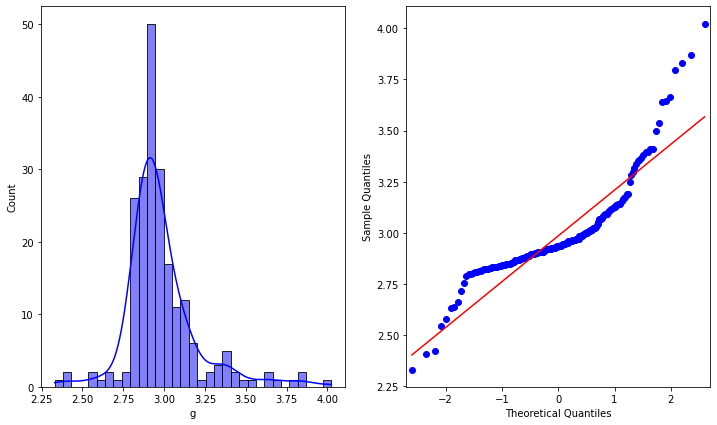

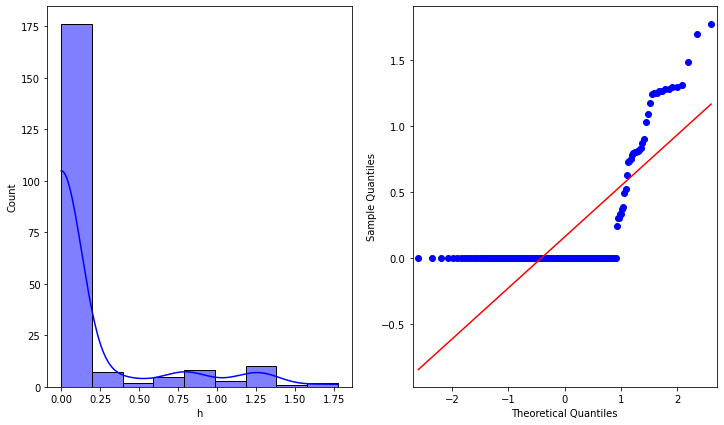

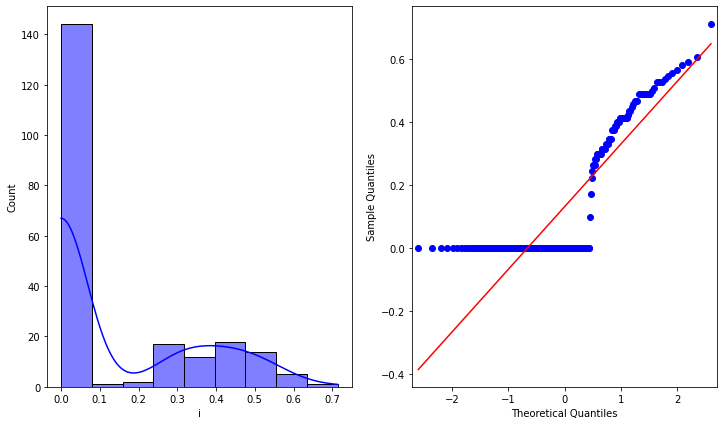

In [ ]:
#To plot the distribution and qq plot of the variables
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.a, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.a).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.b, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.b).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.c, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.c).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.d, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.d).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.e, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.e).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.f, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.f).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.g, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.g).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.h, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.h).qqplot(line='s', ax=ax[1])

fig, ax = plt.subplots(1, 2, figsize=(12, 7))
sns.histplot(df.i, kde=True, color ='blue',ax=ax[0])
sm.ProbPlot(df.i).qqplot(line='s', ax=ax[1])

In [ ]:
#KMO of SMA testing for the variables
kmo_all,kmo_model=calculate_kmo(df)
print("KMO is:",kmo_model)

KMO is: 0.4201378233855649


/usr/local/lib/python3.7/dist-packages/factor_analyzer/utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [ ]:
#To normalize the data
data_scaled = normalize(df)
data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
data_scaled.head()

,a,b,c,d,e,f,g,h,i,cluster
0,0.121641,0.356323,0.185797,0.128375,0.842160,0.072566,0.286886,0.00000,0.026127,0.098750
1,0.120486,0.318942,0.000000,0.141098,0.813526,0.074153,0.355090,0.17281,0.051522,0.194734
2,0.121870,0.360277,0.186848,0.089424,0.837882,0.034209,0.314925,0.00000,0.017104,0.098752
3,0.121809,0.350415,0.185507,0.118238,0.845659,0.074649,0.288946,0.00000,0.000000,0.098875
4,0.121803,0.362277,0.197217,0.107385,0.841669,0.075286,0.282216,0.00000,0.000000,0.098856


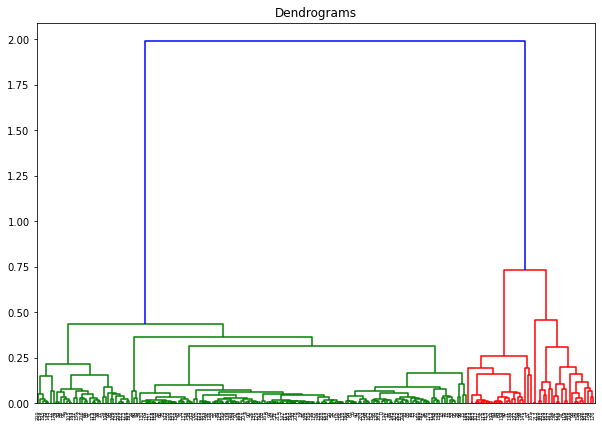

In [ ]:
#To plot dendograms to determine the number of clusters (Hierachical methods)
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

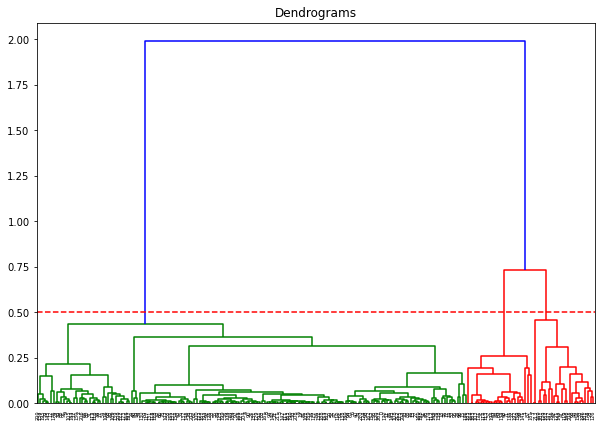

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=0.5, color='r', linestyle='--')

In [ ]:
#To perform cluster prediction
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') 
cluster.fit_predict(data_scaled)

array([1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 2, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
#To predict the cluster
df["cluster"] = cluster.fit_predict(data_scaled)

In [ ]:
df["cluster"].replace({0: 3}, inplace=True)

In [ ]:
#The count of each class
df['cluster'].value_counts()

1    165
2     25
3     24
Name: cluster, dtype: int64

In [ ]:
#To check the mean of each chemical in each cluster
clustergrp = df.groupby("cluster").mean()
print ("Clustering variable means by cluster:")
print(clustergrp)

Clustering variable means by cluster:
                a         b         c  ...         g         h         i
cluster                                ...                              
1        1.232108  3.645374  1.846732  ...  2.930579  0.053530  0.142709
2        1.231759  3.817346  0.054111  ...  2.952504  1.027005  0.080007
3        1.233463  3.596608  0.262638  ...  3.387808  0.000000  0.109395

[3 rows x 9 columns]


In [ ]:
#To perform regression analysis
diff = smm.ols(formula='a ~ C(cluster)', data=df).fit()
print (diff.summary())

                            OLS Regression Results                            
Dep. Variable:                      a   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     16.85
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           1.62e-07
Time:                        15:13:42   Log-Likelihood:                 1146.4
No. Observations:                 214   AIC:                            -2287.
Df Residuals:                     211   BIC:                            -2277.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.2321   8.94e-05   1.

In [ ]:
mc1 = multi.MultiComparison(df["a"], df["cluster"])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.0003 0.3353 -0.0009 0.0002  False
     1      3   0.0014  0.001  0.0008 0.0019   True
     2      3   0.0017  0.001  0.0009 0.0025   True
---------------------------------------------------


In [ ]:
diff = smm.ols(formula='b ~ C(cluster)', data=df).fit()
print (diff.summary())

                            OLS Regression Results                            
Dep. Variable:                      b   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     52.50
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           3.13e-19
Time:                        15:03:58   Log-Likelihood:                -216.58
No. Observations:                 214   AIC:                             439.2
Df Residuals:                     211   BIC:                             449.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.2936      0.052    2

In [ ]:
mc1 = multi.MultiComparison(df["b"], df["cluster"])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  -0.4349 0.011 -0.7872 -0.0827   True
     1      3   1.3248 0.001  0.9909  1.6588   True
     2      3   1.7598 0.001  1.3067  2.2128   True
---------------------------------------------------


In [ ]:
diff = smm.ols(formula='c ~ C(cluster)', data=df).fit()
print (diff.summary())

                            OLS Regression Results                            
Dep. Variable:                      c   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     950.2
Date:                Wed, 11 Aug 2021   Prob (F-statistic):          2.96e-106
Time:                        15:03:59   Log-Likelihood:                -135.10
No. Observations:                 214   AIC:                             276.2
Df Residuals:                     211   BIC:                             286.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.4279      0.036     

In [ ]:
mc1 = multi.MultiComparison(df["c"], df["cluster"])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2  -3.1209 0.001 -3.3616 -2.8802   True
     1      3  -3.3575 0.001 -3.5857 -3.1293   True
     2      3  -0.2366 0.171 -0.5461   0.073  False
---------------------------------------------------


In [ ]:
diff = smm.ols(formula='d ~ C(cluster)', data=df).fit()
print (diff.summary())

                            OLS Regression Results                            
Dep. Variable:                      d   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     52.76
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           2.62e-19
Time:                        15:03:59   Log-Likelihood:                -111.11
No. Observations:                 214   AIC:                             228.2
Df Residuals:                     211   BIC:                             238.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.3336      0.032     

In [ ]:
mc1 = multi.MultiComparison(df["d"], df["cluster"])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     1      2   0.0364   0.9 -0.1788 0.2516  False
     1      3   0.8841 0.001  0.6801 1.0881   True
     2      3   0.8477 0.001   0.571 1.1244   True
--------------------------------------------------


In [ ]:
diff = smm.ols(formula='e ~ C(cluster)', data=df).fit()
print (diff.summary())

                            OLS Regression Results                            
Dep. Variable:                      e   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.915
Date:                Wed, 11 Aug 2021   Prob (F-statistic):             0.0564
Time:                        15:03:59   Log-Likelihood:                -245.56
No. Observations:                 214   AIC:                             497.1
Df Residuals:                     211   BIC:                             507.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          72.5950      0.060   12

In [ ]:
mc1 = multi.MultiComparison(df["e"], df["cluster"])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0789 0.8803 -0.3244 0.4822  False
     1      3   0.3904 0.0442   0.008 0.7727   True
     2      3   0.3115 0.3344 -0.2072 0.8302  False
---------------------------------------------------


In [ ]:
diff = smm.ols(formula='f ~ C(cluster)', data=df).fit()
print (diff.summary())

                            OLS Regression Results                            
Dep. Variable:                      f   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.4455
Date:                Wed, 11 Aug 2021   Prob (F-statistic):              0.641
Time:                        15:03:59   Log-Likelihood:                -211.23
No. Observations:                 214   AIC:                             428.5
Df Residuals:                     211   BIC:                             438.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5022      0.051     

In [ ]:
mc1 = multi.MultiComparison(df["f"], df["cluster"])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   -0.114 0.6964 -0.4575 0.2296  False
     1      3   0.0581    0.9 -0.2675 0.3838  False
     2      3   0.1721 0.6184 -0.2697  0.614  False
---------------------------------------------------


In [ ]:
diff = smm.ols(formula='g ~ C(cluster)', data=df).fit()
print (diff.summary())

                            OLS Regression Results                            
Dep. Variable:                      g   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     144.5
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           3.00e-40
Time:                        15:03:59   Log-Likelihood:                -286.37
No. Observations:                 214   AIC:                             578.7
Df Residuals:                     211   BIC:                             588.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           8.6058      0.072    1

In [ ]:
mc1 = multi.MultiComparison(df["g"], df["cluster"])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2   3.4577  0.001  2.9697  3.9458   True
     1      3  -0.1681 0.6539 -0.6308  0.2946  False
     2      3  -3.6258  0.001 -4.2535 -2.9981   True
----------------------------------------------------


In [ ]:
diff = smm.ols(formula='h ~ C(cluster)', data=df).fit()
print (diff.summary())

                            OLS Regression Results                            
Dep. Variable:                      h   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     72.28
Date:                Wed, 11 Aug 2021   Prob (F-statistic):           1.23e-24
Time:                        15:03:59   Log-Likelihood:                -97.790
No. Observations:                 214   AIC:                             201.6
Df Residuals:                     211   BIC:                             211.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0468      0.030     

In [ ]:
mc1 = multi.MultiComparison(df["h"], df["cluster"])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0901 0.5427 -0.1121 0.2923  False
     1      3   0.9755  0.001  0.7838 1.1671   True
     2      3   0.8854  0.001  0.6253 1.1454   True
---------------------------------------------------


In [ ]:
diff = smm.ols(formula='i ~ C(cluster)', data=df).fit()
print (diff.summary())

                            OLS Regression Results                            
Dep. Variable:                      i   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.805
Date:                Wed, 11 Aug 2021   Prob (F-statistic):             0.0627
Time:                        15:03:59   Log-Likelihood:                 197.96
No. Observations:                 214   AIC:                            -389.9
Df Residuals:                     211   BIC:                            -379.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0625      0.008     

In [ ]:
mc1 = multi.MultiComparison(df["i"], df["cluster"])
res1 = mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2   0.0027    0.9  -0.048 0.0535  False
     1      3  -0.0475  0.054 -0.0956 0.0006  False
     2      3  -0.0502 0.1671 -0.1155 0.0151  False
---------------------------------------------------
